In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from notebook_utils import timeseries_rel

In [2]:
sns.set_theme(context='notebook', style='whitegrid')

In [61]:
cdl_names = pd.read_csv("../data/cdl_codes.csv", low_memory=False, index_col='Codes')['Class_Names']
cdl_names

Codes
0                    Background
1                          Corn
2                        Cotton
3                          Rice
4                       Sorghum
                 ...           
251                         NaN
252                         NaN
253                         NaN
254    Dbl Crop Barley/Soybeans
255                         NaN
Name: Class_Names, Length: 256, dtype: object

In [76]:
metadata = pd.read_csv("../data/huc8/10020008_metadata.csv", low_memory=False, index_col=0)[['field_id', 'crop_2022', 'hectares']]
metadata.set_index('field_id', inplace=True)
metadata.head()

,crop_2022,hectares
field_id,,
3024668,152,1.211
3024671,152,2.712
3024672,152,3.107
3024679,152,16.694
3024838,176,4.261


In [77]:
etofs = pd.read_csv("../data/huc8/montana.csv", low_memory=False, index_col=0)
etofs['time'] = pd.to_datetime(etofs['time'])
etofs.set_index('field_id', inplace=True)
etofs = etofs.join(metadata, on='field_id', how='left', validate='many_to_one')
etofs = etofs.join(cdl_names, on='crop_2022')
etofs.head()

,time,collection,value_mm,crop_2022,hectares,Class_Names
field_id,,,,,,
3024838,2022-01-01,geesebal_etof,1.236,176,4.261,Grass/Pasture
3030886,2022-01-01,geesebal_etof,1.236,47,19.978,Misc Vegs & Fruits
3029242,2022-01-01,eemetric_etof,0.000,36,14.376,Alfalfa
3029243,2022-01-01,eemetric_etof,0.085,47,26.433,Misc Vegs & Fruits
3029244,2022-01-01,eemetric_etof,0.000,47,4.271,Misc Vegs & Fruits


In [78]:
time_mask = (etofs['time'].dt.month >= 6) & (etofs['time'].dt.month <= 8)
summer_maxes = etofs[time_mask].groupby(['field_id', 'collection', 'crop_2022', 'Class_Names', 'hectares'])['value_mm'].agg('max')
summer_maxes = summer_maxes.reset_index()
summer_maxes.head(10)

,field_id,collection,crop_2022,Class_Names,hectares,value_mm
0,3024838,disalexi_etof,176,Grass/Pasture,4.261,0.581
1,3024838,eemetric_etof,176,Grass/Pasture,4.261,0.749
2,3024838,ensemble_etof,176,Grass/Pasture,4.261,0.734
3,3024838,geesebal_etof,176,Grass/Pasture,4.261,0.813
4,3024838,ptjpl_etof,176,Grass/Pasture,4.261,0.718
5,3024838,sims_etof,176,Grass/Pasture,4.261,0.954
6,3024838,ssebop_etof,176,Grass/Pasture,4.261,0.735
7,3025005,disalexi_etof,47,Misc Vegs & Fruits,51.245,0.253
8,3025005,eemetric_etof,47,Misc Vegs & Fruits,51.245,0.321
9,3025005,ensemble_etof,47,Misc Vegs & Fruits,51.245,0.314


In [79]:
summer_maxes.to_csv('10020008_060708_2022_etof_max.csv')

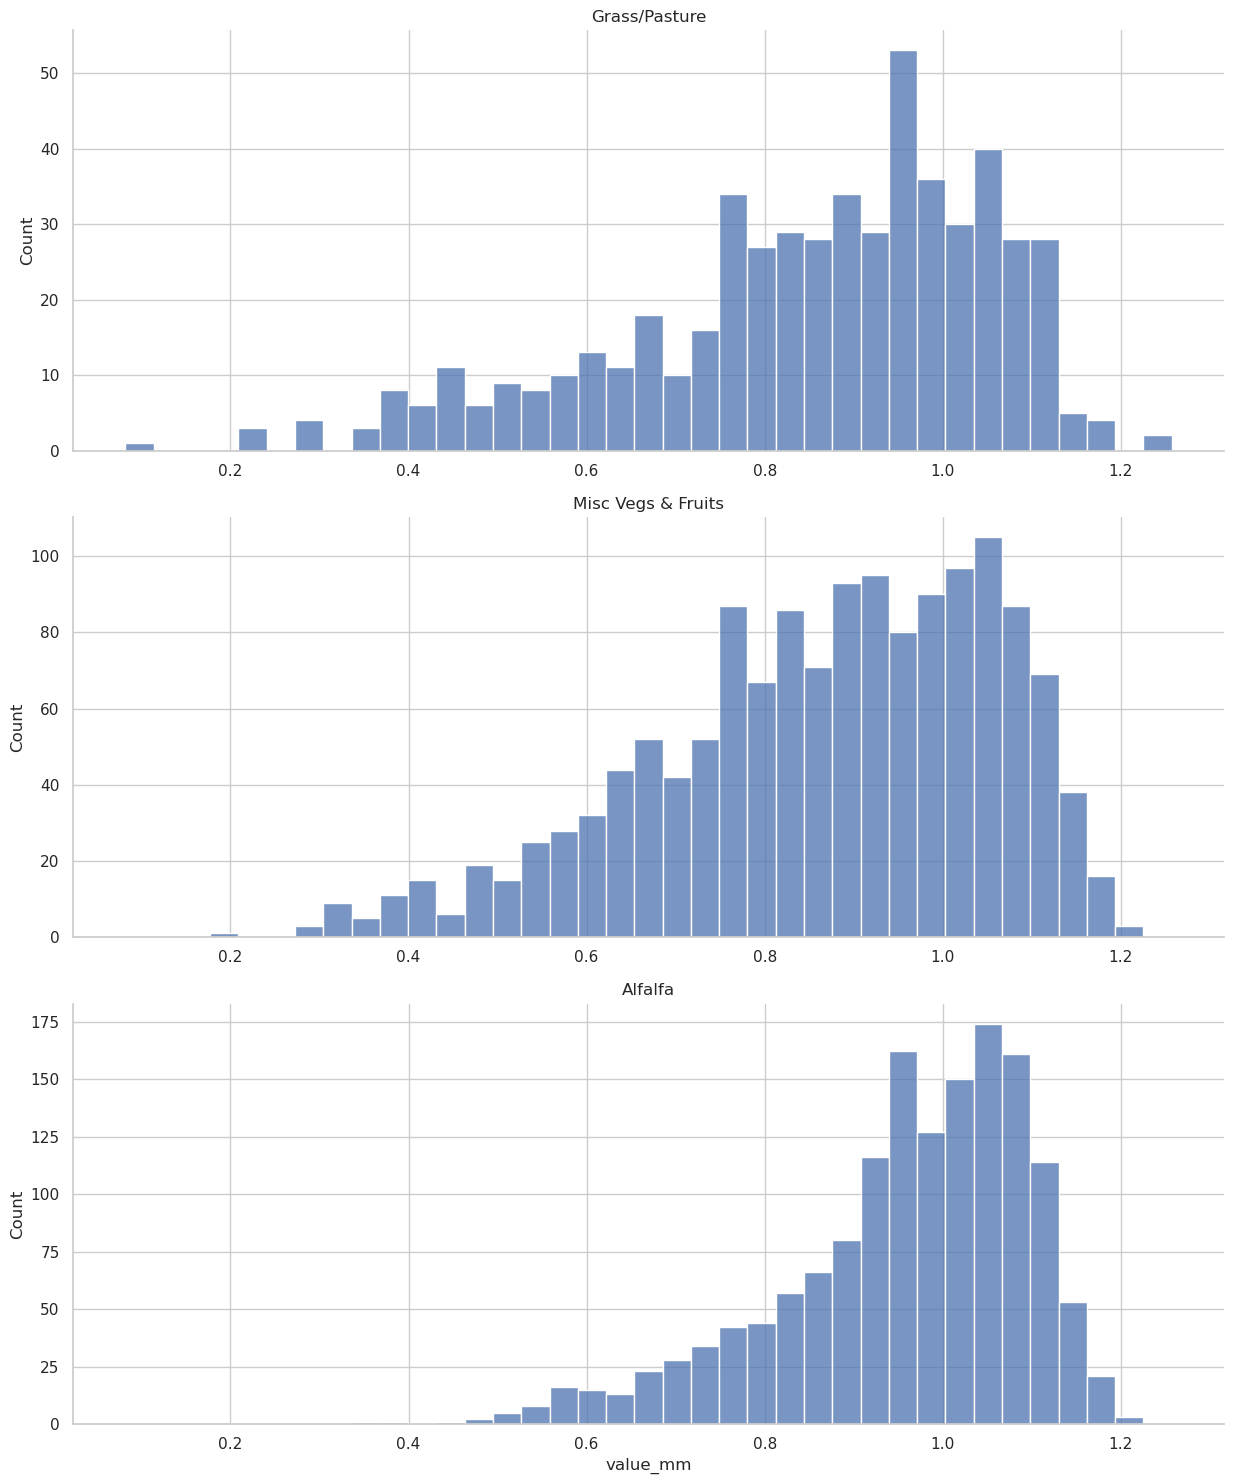

In [75]:
dis = sns.displot(summer_maxes[summer_maxes['collection'] == 'eemetric_etof'], x='value_mm', row='Class_Names', aspect=2.5, facet_kws={'sharex': False, 'sharey': False});
dis.set_titles(row_template="{row_name}");